In [2]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
# !pip install yfinance

In [3]:
import numpy as np
import pandas as pd
from matplotlib import style
import datetime
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import yfinance as yf
import csv

# Define the stock ticker and the date range
ticker = 'BBCA.JK'
start_date = '2010-01-04'
end_date = '2019-12-01'

train_start_date = '2010-01-04'
train_end_date = '2019-12-01'

test_start_date = '2020-01-02'
test_end_date = '2022-12-01'

validation_start_date = '2023-01-02'
validation_end_date = datetime.date.today()


# Get the data
train_data = yf.download(ticker, start=train_start_date, end=train_end_date)

train_data.to_csv('train_data.csv')


# Get the stock data using yahoo API:
# get 2009-2019 data to train our model
#train_data = web.DataReader('AAPL', 'yahoo', datetime.datetime(2010,1,4),datetime.datetime(2019,12,1)) 

# get 2020 data to present date to test the SVM model
#test_data = web.DataReader('AAPL', 'yahoo',  datetime.datetime(2020,1,2), datetime.date.today()) 
test_data = yf.download(ticker, start=test_start_date, end=test_end_date)

validation_data = yf.download(ticker, start=validation_start_date, end=validation_end_date)
#test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,4), datetime.datetime(2021,12,1)) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,796.387756,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,804.273010,44442500
2010-01-06,990.0,1020.0,990.0,990.0,780.617615,27782500
2010-01-07,995.0,995.0,965.0,995.0,784.560242,38632500
2010-01-08,970.0,995.0,970.0,970.0,764.847534,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5610.079590,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5619.020020,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5632.430176,58833500


In [6]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6000.032227,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6098.687500,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6040.390625,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6044.876465,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,5991.063965,53692500
...,...,...,...,...,...,...
2022-11-24,8975.0,9000.0,8950.0,9000.0,8508.108398,53520800
2022-11-25,9000.0,9000.0,8900.0,8975.0,8484.474609,75048300
2022-11-28,9050.0,9100.0,8975.0,9025.0,8531.742188,96209700


In [7]:
validation_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,8575.0,8600.0,8500.0,8550.0,8114.258301,10653900
2023-01-03,8550.0,8600.0,8525.0,8550.0,8114.258301,27399100
2023-01-04,8525.0,8575.0,8350.0,8350.0,7924.451172,90918800
2023-01-05,8350.0,8375.0,8150.0,8250.0,7829.547363,128838500
2023-01-06,8100.0,8325.0,8100.0,8300.0,7876.999512,69286600
...,...,...,...,...,...,...
2024-11-22,9925.0,9950.0,9850.0,9850.0,9850.000000,58396100
2024-11-25,9950.0,10200.0,9900.0,10175.0,10175.000000,165369400
2024-11-26,10250.0,10250.0,10000.0,10000.0,10000.000000,62310100


In [8]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

In [9]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,796.387756,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,804.273010,44442500
2010-01-06,990.0,1020.0,990.0,990.0,780.617615,27782500
2010-01-07,995.0,995.0,965.0,995.0,784.560242,38632500
2010-01-08,970.0,995.0,970.0,970.0,764.847534,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5610.079590,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5619.020020,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5632.430176,58833500


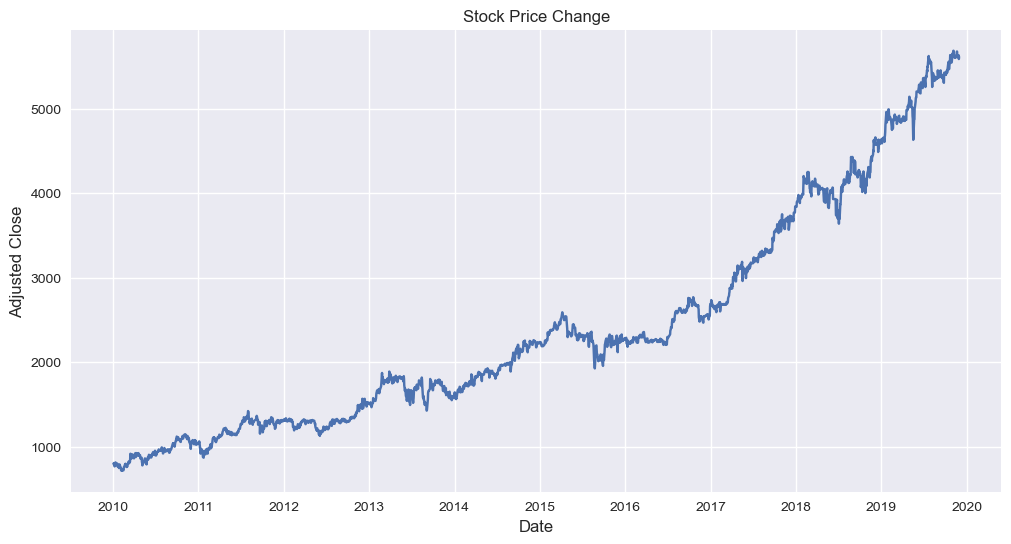

In [10]:
from matplotlib import pyplot as plt

style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

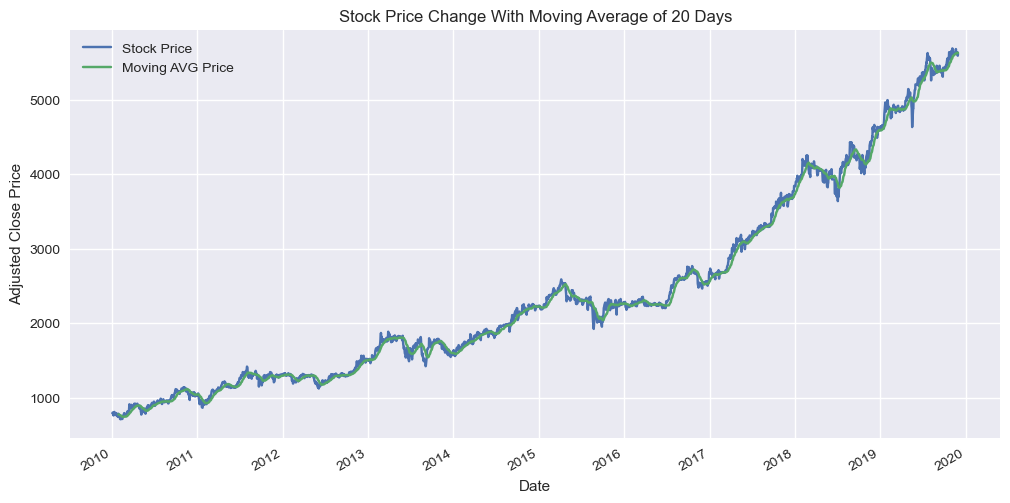

In [11]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg_20 = close_price.rolling(window=20).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 20 Days")
close_price.plot(label='Stock Price')
moving_avg_20.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

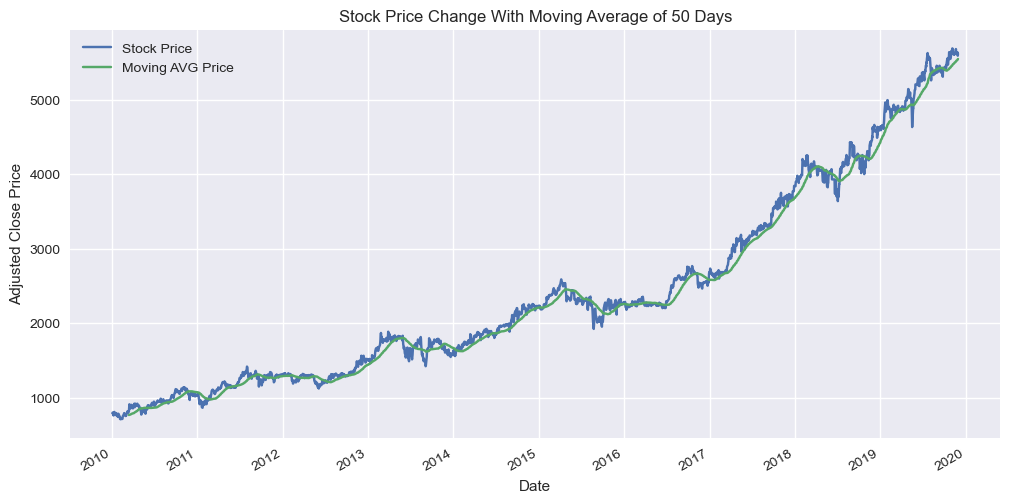

In [12]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg_50 = close_price.rolling(window=50).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 50 Days")
close_price.plot(label='Stock Price')
moving_avg_50.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

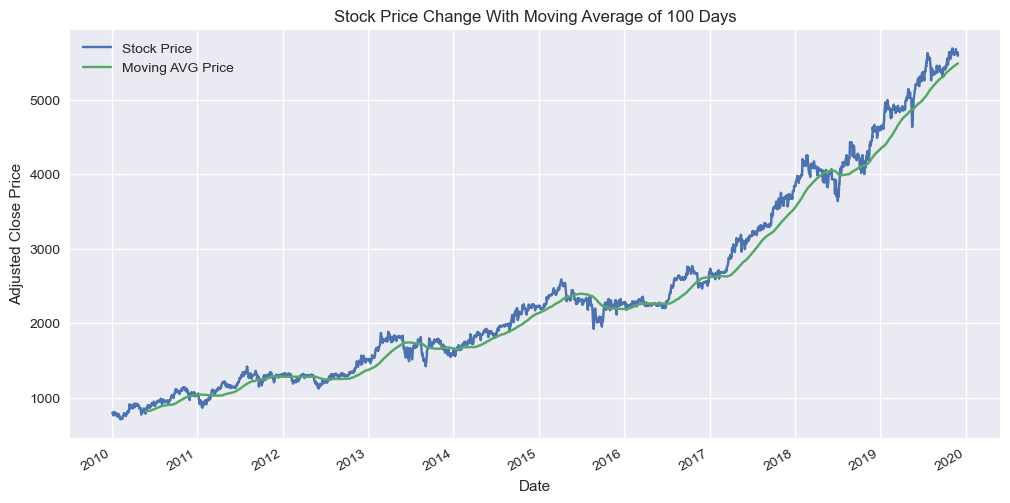

In [13]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg_100 = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg_100.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

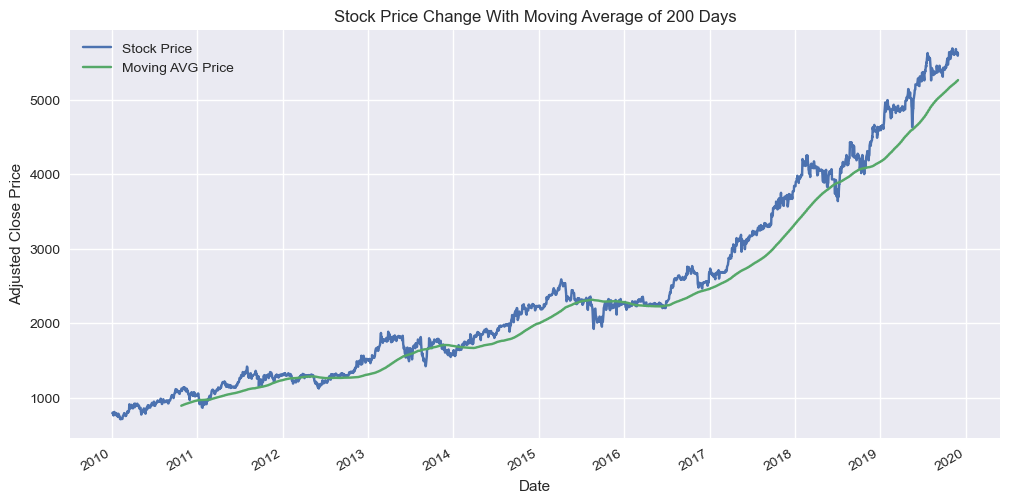

In [14]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg_200 = close_price.rolling(window=200).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 200 Days")
close_price.plot(label='Stock Price')
moving_avg_200.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

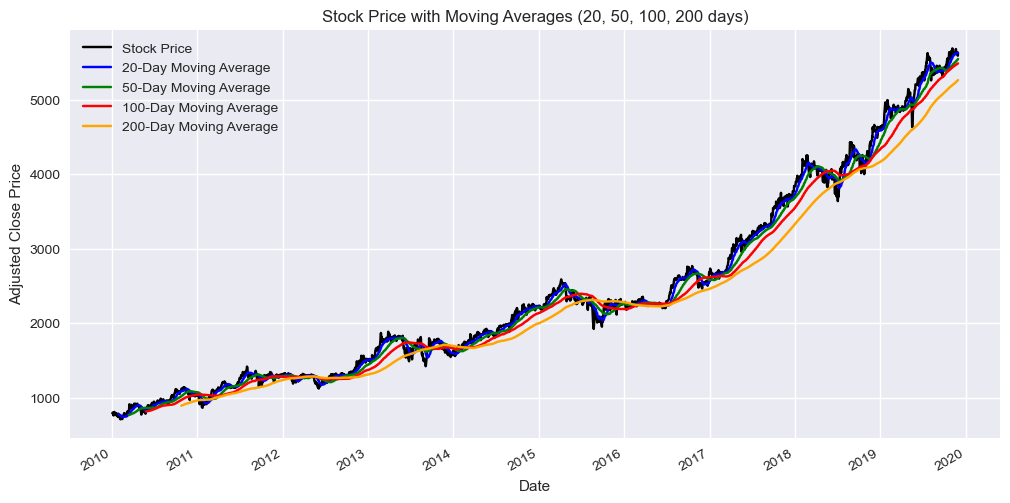

In [15]:
close_price = train_data['Adj Close']

# Calculate moving averages
moving_avg_20 = close_price.rolling(window=20).mean()
moving_avg_50 = close_price.rolling(window=50).mean()
moving_avg_100 = close_price.rolling(window=100).mean()
moving_avg_200 = close_price.rolling(window=200).mean()

# Plotting the stock price and the moving averages
plt.figure(figsize=(12, 6))
plt.title("Stock Price with Moving Averages (20, 50, 100, 200 days)")
close_price.plot(label='Stock Price', color='black')
moving_avg_20.plot(label='20-Day Moving Average', color='blue')
moving_avg_50.plot(label='50-Day Moving Average', color='green')
moving_avg_100.plot(label='100-Day Moving Average', color='red')
moving_avg_200.plot(label='200-Day Moving Average', color='orange')

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

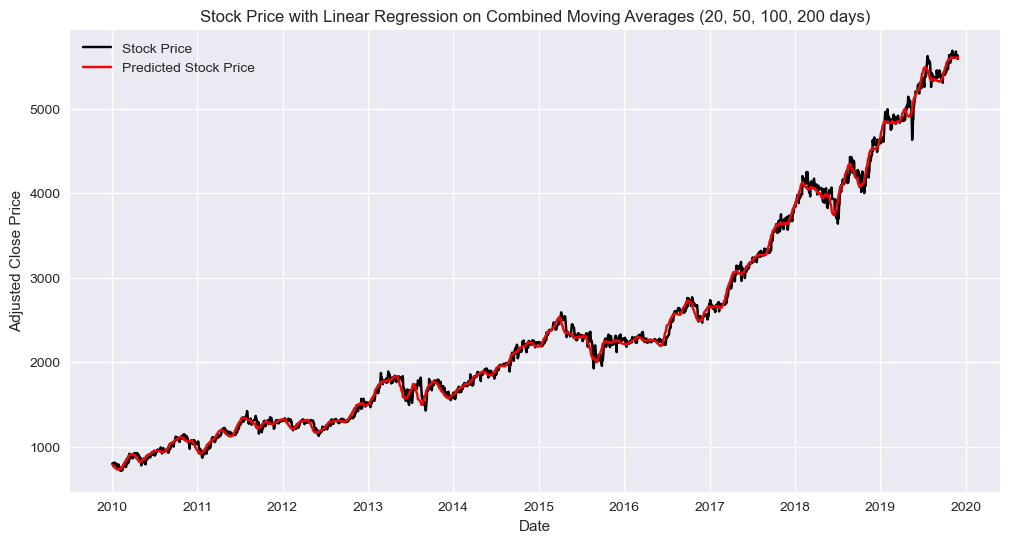

Linear Regression Coefficients:
20-Day Moving Avg Coefficient: 1.3005560162806415
50-Day Moving Avg Coefficient: -0.4667592979838956
100-Day Moving Avg Coefficient: 0.18231456756164044
200-Day Moving Avg Coefficient: -0.024240124260019258


In [16]:
close_price = train_data['Adj Close']

# Calculate the moving averages with the proper handling of NaN values
moving_avg_20 = close_price.rolling(window=20).mean()
moving_avg_50 = close_price.rolling(window=50).mean()
moving_avg_100 = close_price.rolling(window=100).mean()
moving_avg_200 = close_price.rolling(window=200).mean()

# Optionally, you could shift the moving averages if you want to retain more of the initial data
# For example, shift them forward so the first data point aligns with the moving average calculation
moving_avg_20 = moving_avg_20.shift(-19)  # Shift so that the first 19 values are filled by later data
moving_avg_50 = moving_avg_50.shift(-49)
moving_avg_100 = moving_avg_100.shift(-99)
moving_avg_200 = moving_avg_200.shift(-199)

# Concatenate and forward fill the NaNs (if necessary)
aligned_data = pd.concat([close_price, moving_avg_20, moving_avg_50, moving_avg_100, moving_avg_200], axis=1)

# You can fill the NaNs with linear interpolation instead of mean filling
aligned_data.interpolate(method='linear', axis=0, inplace=True)

# Rename columns for clarity
aligned_data.columns = ['Adj Close', '20', '50', '100', '200']

# Redefine variables after alignment (now no NaNs exist in aligned_data)
close_price = aligned_data['Adj Close']
moving_avg_20 = aligned_data['20']
moving_avg_50 = aligned_data['50']
moving_avg_100 = aligned_data['100']
moving_avg_200 = aligned_data['200']

# Initialize the linear regression model
model = LinearRegression()

# Combine the moving averages into one DataFrame (independent variables)
X = aligned_data[['20', '50', '100', '200']]  # Features (moving averages)
y = close_price  # Target (stock price)

# Fit the model
model.fit(X, y)

# Predict the stock price based on the moving averages
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Stock Price with Linear Regression on Combined Moving Averages (20, 50, 100, 200 days)")

# Plot the original stock price
plt.plot(close_price.index, close_price, label='Stock Price', color='black')

# Plot the predicted stock price
plt.plot(close_price.index, y_pred, label='Predicted Stock Price', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients for each moving average
print("Linear Regression Coefficients:")
print(f"20-Day Moving Avg Coefficient: {model.coef_[0]}")
print(f"50-Day Moving Avg Coefficient: {model.coef_[1]}")
print(f"100-Day Moving Avg Coefficient: {model.coef_[2]}")
print(f"200-Day Moving Avg Coefficient: {model.coef_[3]}")


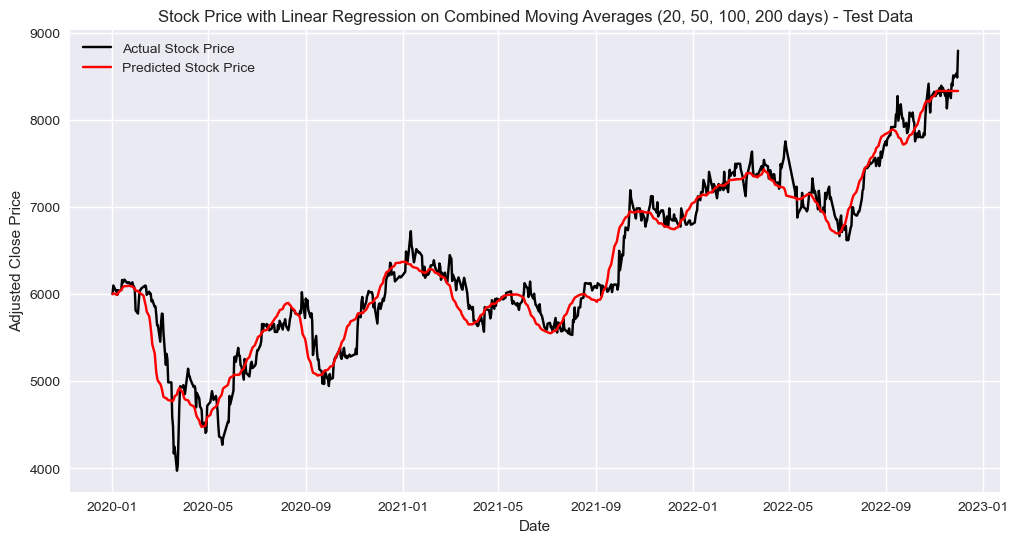

Model Evaluation on Test Data:
Mean Squared Error: 46432.724750370275
R-squared: 0.9488989885665637


In [17]:
# Prepare the test data (same as you did for the training data)
test_close_price = test_data['Adj Close']

# Calculate the moving averages for the testing data
test_moving_avg_20 = test_close_price.rolling(window=20).mean()
test_moving_avg_50 = test_close_price.rolling(window=50).mean()
test_moving_avg_100 = test_close_price.rolling(window=100).mean()
test_moving_avg_200 = test_close_price.rolling(window=200).mean()

# Shift moving averages for testing data
test_moving_avg_20 = test_moving_avg_20.shift(-19)
test_moving_avg_50 = test_moving_avg_50.shift(-49)
test_moving_avg_100 = test_moving_avg_100.shift(-99)
test_moving_avg_200 = test_moving_avg_200.shift(-199)

# Concatenate and forward fill the NaNs for testing data
test_aligned_data = pd.concat([test_close_price, test_moving_avg_20, test_moving_avg_50, test_moving_avg_100, test_moving_avg_200], axis=1)

# Fill the NaNs using linear interpolation
test_aligned_data.interpolate(method='linear', axis=0, inplace=True)

# Rename columns for clarity
test_aligned_data.columns = ['Adj Close', '20', '50', '100', '200']

# Prepare test data for prediction
X_test = test_aligned_data[['20', '50', '100', '200']]  # Features (moving averages)
y_test = test_close_price  # Actual stock prices (target)

# Predict stock prices on the test data
y_test_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Stock Price with Linear Regression on Combined Moving Averages (20, 50, 100, 200 days) - Test Data")

# Plot the actual test stock price
plt.plot(test_close_price.index, test_close_price, label='Actual Stock Price', color='black')

# Plot the predicted test stock price
plt.plot(test_close_price.index, y_test_pred, label='Predicted Stock Price', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model performance on test data (optional)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Model Evaluation on Test Data:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [18]:
import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,14613.0,1010.0,1010.0,965.0,1010.0,796.387756,77812500
1,14614.0,1020.0,1020.0,990.0,1020.0,804.273010,44442500
2,14615.0,990.0,1020.0,990.0,990.0,780.617615,27782500
3,14616.0,995.0,995.0,965.0,995.0,784.560242,38632500
4,14617.0,970.0,995.0,970.0,970.0,764.847534,27427500
...,...,...,...,...,...,...,...
2466,18225.0,6330.0,6335.0,6275.0,6275.0,5610.079590,55133500
2467,18226.0,6330.0,6330.0,6270.0,6285.0,5619.020020,192783500
2468,18227.0,6270.0,6300.0,6240.0,6300.0,5632.430176,58833500
2469,18228.0,6295.0,6295.0,6245.0,6250.0,5587.727539,44248000


In [19]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = y_pred  # CHANGES from the original code Use the predicted values from linear regression instead of actual prices

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1)).ravel()

In [20]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1e4))
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

In [21]:
SVR_linear_train

array([ 476.59428933,  477.60413463,  478.61397995, ..., 4126.17524596,
       4127.18509127, 4128.19493656])

In [22]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'C': [1e3, 1e4, 1e5, 1e6], 
#     'gamma': [0.01, 0.1, 1, 10]
# }

# # Use GridSearchCV to find the optimal parameters
# grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, verbose=3)
# grid_search.fit(dates_data, prices_data)

# # Best parameters
# print("Best parameters:", grid_search.best_params_)


In [45]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1) 
# Large gamma: overfitting, Small gamma: underfitting
# Smaller C will make the algorithm faster, but may decrease the model's performance
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)

In [46]:
SVR_rbfk_train

array([ 786.18910672,  782.93792693,  784.27146028, ..., 5604.09816083,
       5625.8083493 , 5604.09789568])

In [47]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=3, epsilon=0.1, coef0=1))
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

In [48]:
SVR_poly_train

array([ 742.1008038 ,  743.2013883 ,  744.30085959, ..., 5769.18264274,
       5773.16819116, 5777.1564504 ])

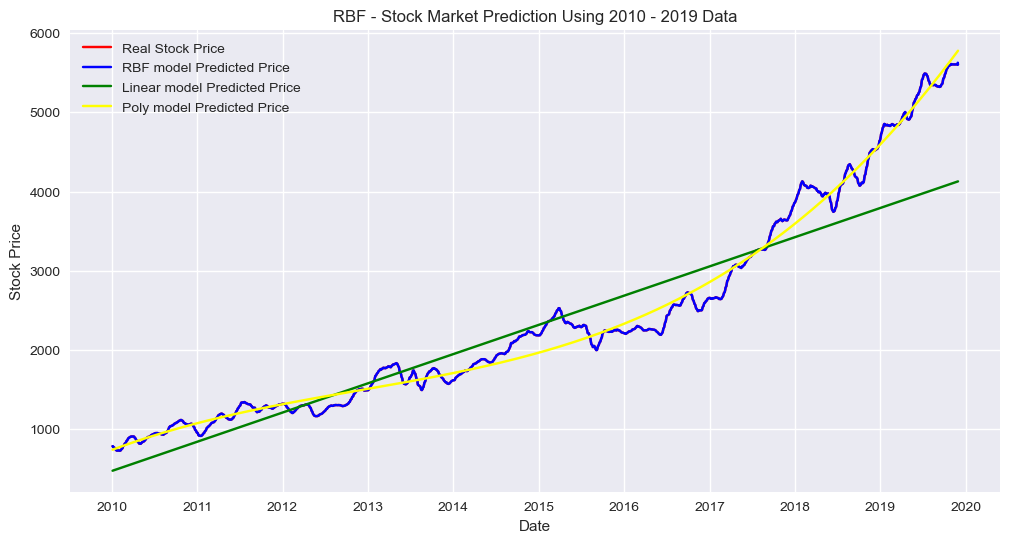

In [49]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2010 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [50]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [51]:
test_indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,18263.0,6695.0,6780.0,6680.0,6690.0,6000.032227,49445000
1,18264.0,6750.0,6800.0,6725.0,6800.0,6098.687500,47755500
2,18267.0,6720.0,6750.0,6690.0,6735.0,6040.390625,27300000
3,18268.0,6735.0,6770.0,6730.0,6740.0,6044.876465,45022500
4,18269.0,6670.0,6745.0,6670.0,6680.0,5991.063965,53692500
...,...,...,...,...,...,...,...
708,19320.0,8975.0,9000.0,8950.0,9000.0,8508.108398,53520800
709,19321.0,9000.0,9000.0,8900.0,8975.0,8484.474609,75048300
710,19324.0,9050.0,9100.0,8975.0,9025.0,8531.742188,96209700
711,19325.0,8975.0,9075.0,8925.0,8975.0,8484.474609,91562100


In [52]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = y_test_pred
#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [53]:
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)
SVR_rbfk_test

array([2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441131,
       2407.25441131, 2407.25441131, 2407.25441131, 2407.25441

In [54]:
SVR_linear_test =  SVR_linear.predict(test_dates_data)
SVR_linear_test

array([4162.52967718, 4163.53952248, 4166.56905843, 4167.57890375,
       4168.58874904, 4169.59859438, 4170.60843971, 4173.63797562,
       4174.64782092, 4175.65766624, 4176.66751153, 4177.67735687,
       4180.70689279, 4181.71673812, 4182.7265834 , 4183.73642872,
       4184.74627405, 4187.77581   , 4188.78565529, 4189.79550061,
       4190.80534592, 4191.81519123, 4194.84472715, 4195.85457247,
       4196.86441778, 4197.8742631 , 4198.8841084 , 4201.91364433,
       4202.92348964, 4203.93333497, 4204.94318024, 4205.95302559,
       4208.9825615 , 4209.99240684, 4211.00225215, 4212.01209747,
       4213.02194277, 4216.05147871, 4217.06132401, 4218.07116932,
       4219.08101466, 4220.09085995, 4223.12039589, 4224.1302412 ,
       4225.14008652, 4226.14993183, 4227.15977713, 4230.18931307,
       4231.19915837, 4232.20900369, 4233.21884903, 4234.22869432,
       4237.25823027, 4238.26807557, 4239.27792087, 4240.28776617,
       4241.29761151, 4244.32714742, 4245.33699276, 4247.35668

In [55]:
SVR_poly_test = SVR_poly.predict(test_dates_data)
SVR_poly_test

array([ 5914.37775114,  5918.46155534,  5930.72946555,  5934.82427171,
        5938.92183099,  5943.02214446,  5947.12521319,  5959.45096146,
        5963.56506176,  5967.68192262,  5971.80154507,  5975.92393018,
        5988.30767203,  5992.44111834,  5996.57733261,  6000.71631588,
        6004.85806922,  6017.2999602 ,  6021.45280437,  6025.60842391,
        6029.76681985,  6033.92799326,  6046.42818891,  6050.60048279,
        6054.77555943,  6058.95341989,  6063.13406523,  6075.69272109,
        6079.88451652,  6084.07910212,  6088.27647895,  6092.47664806,
        6105.09391967,  6109.3052685 ,  6113.51941491,  6117.73635995,
        6121.95610468,  6134.63214759,  6138.86310167,  6143.09686072,
        6147.33342582,  6151.57279801,  6164.30776777,  6168.55837893,
        6172.81180249,  6177.0680395 ,  6181.32709101,  6194.12114314,
        6198.39146325,  6202.66460316,  6206.94056392,  6211.21934659,
        6224.07263665,  6228.36271755,  6232.65562565,  6236.951362  ,
      

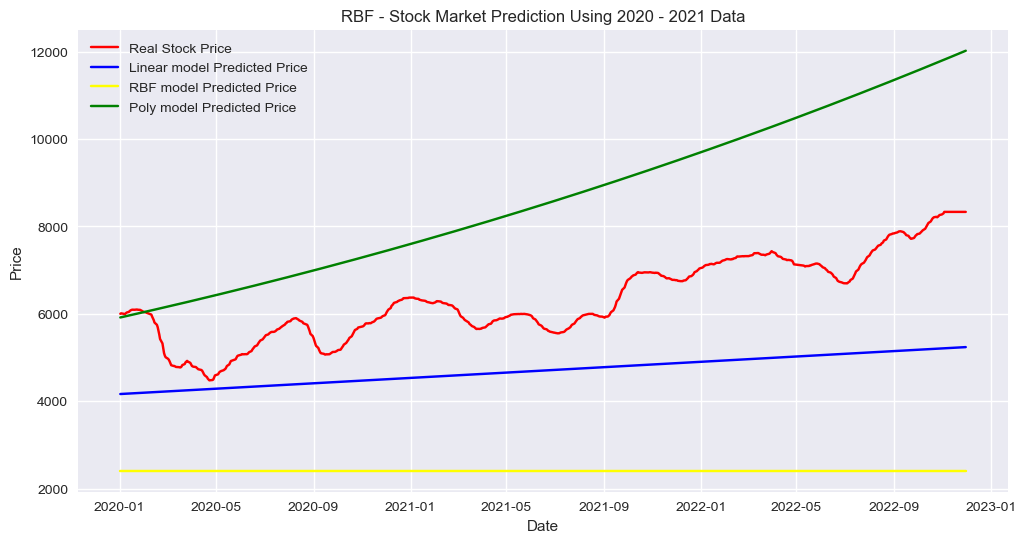

In [56]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))


SVR RBF Train RMSE: 0.59
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 0.16
SVR RBF Test RMSE: 4042.80
SVR RBF Test R2 Score: -17.10
SVR RBF Test MAE Score: 3929.57


In [58]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

SVR Linear Train RMSE: 485.96
SVR Linear Train R2 Score: 0.86
SVR Linear Train MAE Score: 350.62
SVR Linear Test RMSE: 1773.65
SVR Linear Test R2 Score: -2.48
SVR Linear Test MAE Score: 1635.11


In [59]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

SVR Poly Train RMSE: 154.58
SVR Poly Train R2 Score: 0.99
SVR Poly Train MAE Score: 117.17
SVR Poly Test RMSE: 2541.52
SVR Poly Test R2 Score: -6.16
SVR Poly Test MAE Score: 2338.86


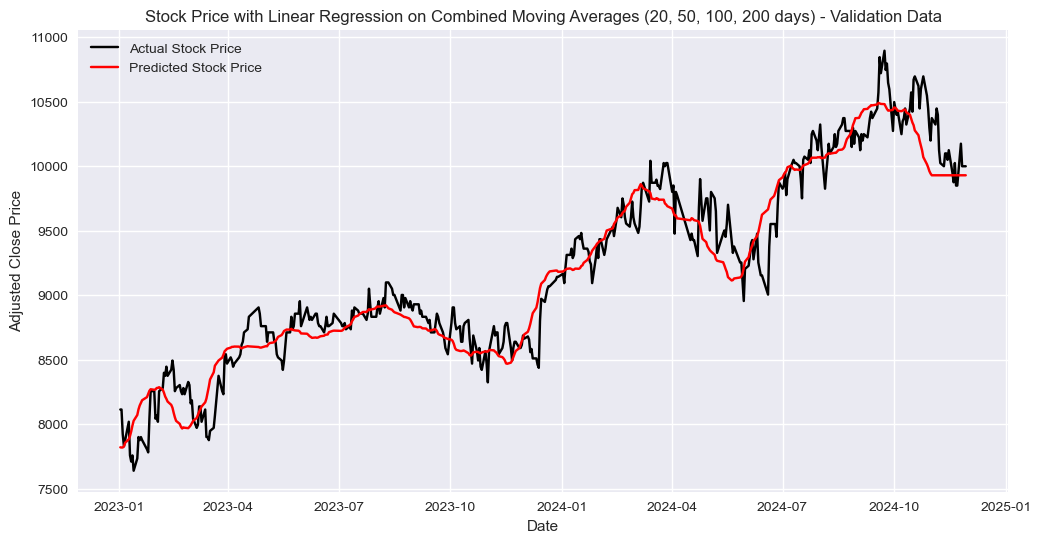

Model Evaluation on Validation Data:
Mean Squared Error: 38591.34118561811
R-squared: 0.931704661067224


In [60]:
# Prepare the validation data (same as you did for the training and testing data)
validation_close_price = validation_data['Adj Close']

# Calculate the moving averages for the validation data
validation_moving_avg_20 = validation_close_price.rolling(window=20).mean()
validation_moving_avg_50 = validation_close_price.rolling(window=50).mean()
validation_moving_avg_100 = validation_close_price.rolling(window=100).mean()
validation_moving_avg_200 = validation_close_price.rolling(window=200).mean()

# Shift moving averages for validation data
validation_moving_avg_20 = validation_moving_avg_20.shift(-19)
validation_moving_avg_50 = validation_moving_avg_50.shift(-49)
validation_moving_avg_100 = validation_moving_avg_100.shift(-99)
validation_moving_avg_200 = validation_moving_avg_200.shift(-199)

# Concatenate and forward fill the NaNs for validation data
validation_aligned_data = pd.concat([validation_close_price, validation_moving_avg_20, validation_moving_avg_50, validation_moving_avg_100, validation_moving_avg_200], axis=1)

# Fill the NaNs using linear interpolation
validation_aligned_data.interpolate(method='linear', axis=0, inplace=True)

# Rename columns for clarity
validation_aligned_data.columns = ['Adj Close', '20', '50', '100', '200']

# Prepare validation data for prediction
X_validation = validation_aligned_data[['20', '50', '100', '200']]  # Features (moving averages)
y_validation = validation_close_price  # Actual stock prices (target)

# Predict stock prices on the validation data
y_validation_pred = model.predict(X_validation)

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Stock Price with Linear Regression on Combined Moving Averages (20, 50, 100, 200 days) - Validation Data")

# Plot the actual validation stock price
plt.plot(validation_close_price.index, validation_close_price, label='Actual Stock Price', color='black')

# Plot the predicted validation stock price
plt.plot(validation_close_price.index, y_validation_pred, label='Predicted Stock Price', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model performance on validation data (optional)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared score
mse_validation = mean_squared_error(y_validation, y_validation_pred)
r2_validation = r2_score(y_validation, y_validation_pred)

# Print evaluation metrics for validation
print("Model Evaluation on Validation Data:")
print(f"Mean Squared Error: {mse_validation}")
print(f"R-squared: {r2_validation}")

Validation Results:
Mean Squared Error: 46783057.92961539
R-squared: -81.79227151621991


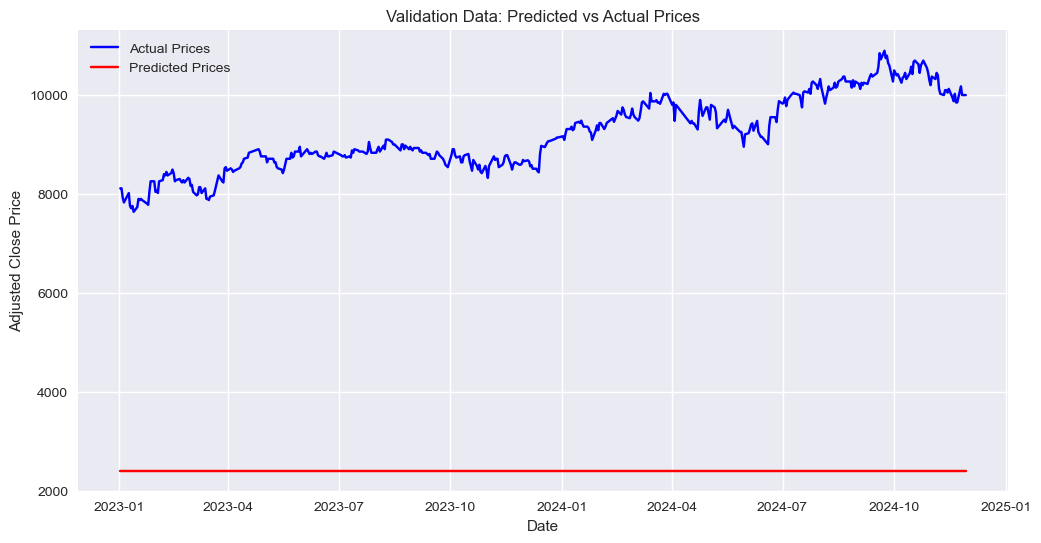

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score

# Process validation data
validation_indxed_dates = validation_data.copy()
validation_indxed_dates = validation_indxed_dates.reset_index()

# Store original dates for plotting
validation_actual_dates = validation_indxed_dates['Date']

# Convert dates to numerical format
validation_indxed_dates['Date'] = validation_indxed_dates['Date'].map(mdates.date2num)

# Prepare validation data
validation_dates_data = validation_indxed_dates['Date'].to_numpy()
validation_prices_data = validation_data['Adj Close'].to_numpy()

# Convert to 1D vector
validation_dates_data = np.reshape(validation_dates_data, (len(validation_dates_data), 1))
validation_prices_data = np.reshape(validation_prices_data, (len(validation_prices_data), 1)).ravel()

# Predict using the trained SVR model
SVR_rbfk_validation = SVR_rbfk.predict(validation_dates_data)

# Evaluate performance
validation_mse = mean_squared_error(validation_prices_data, SVR_rbfk_validation)
validation_r2 = r2_score(validation_prices_data, SVR_rbfk_validation)

print("Validation Results:")
print(f"Mean Squared Error: {validation_mse}")
print(f"R-squared: {validation_r2}")

# Plot validation results
plt.figure(figsize=(12, 6))
plt.title("Validation Data: Predicted vs Actual Prices")
plt.plot(validation_actual_dates, validation_prices_data, label='Actual Prices', color='blue')
plt.plot(validation_actual_dates, SVR_rbfk_validation, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()
